In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../modules')
from FSC import GenerationDiscreteObs as FSC_DiscreteObs
from FSC import InferenceDiscreteObs as FSC_InferenceDiscreteObs
import ObsModels 

In [3]:
# set matplotlib font to avenir
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

# Finite State Controller with $M = 2$, $A = 2$, $Y = 2$

# Observations, one step

In [4]:
NStepsObs = 1
NTraj = 500
Y = 2
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 2*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NTraj, NStepsObs, RateMatrixObs, initial_seed = 0)

In [5]:
M = 2
A = 2

np.random.seed(0)
Theta = np.random.randn(Y, M, M, A)

Psi = np.array([1, 1])

FSC = FSC_DiscreteObs(Theta, Psi, verbose = True)

Initializing FSC with 2 memory states, 2 actions, and 2 observations.


In [6]:
FSC.load_observations(observations)

In [7]:
NSteps = NStepsObs
trajectories = FSC.generate_trajectories(NSteps)
Time = np.arange(NSteps)

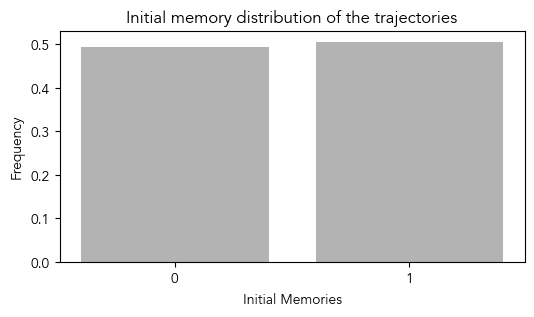

In [26]:
initial_memories = np.array([tr["memories"][0] for tr in trajectories])

fig, ax = plt.subplots(1,1, figsize=(6,3))

h, bins_h = np.histogram(initial_memories.flatten(), bins = np.arange(-0.5, M+0.5, 1))
h = h/np.sum(h)
bins_h = (bins_h[1:] + bins_h[:-1])/2

ax.bar(bins_h, h, width = 0.8, color = 'dimgray', alpha = 0.5)

ax.set_xlabel('Initial Memories')
ax.set_ylabel('Frequency')

ax.set_xticks(np.arange(0, M, 1))

ax.set_title('Initial memory distribution of the trajectories')

plt.show()

In [11]:
FSC.evaluate_nloglikelihood(trajectories[0])

0.4169199915511197

### Inference

In [12]:
FSC_tofit = FSC_InferenceDiscreteObs(M, A, Y, seed = 123)
FSC_tofit.load_theta(Theta.astype(np.float32))
FSC_tofit.load_trajectories(trajectories)
FSC_tofit.evaluate_nloglikelihood(idx_traj = 0)

tensor(0.6199, device='mps:0', grad_fn=<SubBackward0>)

In [15]:
psi_pre_fit = FSC_tofit.psi.detach().cpu().numpy()
rho_pre_fit = FSC_tofit.rho.detach().cpu().numpy()

In [16]:
tloss, vloss = FSC_tofit.optimize_psionly(NEpochs = 40, NBatch = 100, lr = 0.1, gamma = 0.9)

Training with 400 trajectories and validating with 100 trajectories.
	 Epoch 1 - Batch 1 - Loss: 0.6627381134033203 - Learning rate: 0.1
	 Epoch 1 - Batch 2 - Loss: 0.702695541381836 - Learning rate: 0.1
	 Epoch 1 - Batch 3 - Loss: 0.6580377197265626 - Learning rate: 0.1
	 Epoch 1 - Batch 4 - Loss: 0.7438172149658203 - Learning rate: 0.1
Epoch 1 - Training loss: 0.6918221473693847, Validation loss: 0.688269145488739
	 Epoch 2 - Batch 1 - Loss: 0.6790699768066406 - Learning rate: 0.09000000000000001
	 Epoch 2 - Batch 2 - Loss: 0.661849365234375 - Learning rate: 0.09000000000000001
	 Epoch 2 - Batch 3 - Loss: 0.7135317993164062 - Learning rate: 0.09000000000000001
	 Epoch 2 - Batch 4 - Loss: 0.7039553833007812 - Learning rate: 0.09000000000000001
Epoch 2 - Training loss: 0.6896016311645508, Validation loss: 0.6857288372516632
	 Epoch 3 - Batch 1 - Loss: 0.6481343078613281 - Learning rate: 0.08100000000000002
	 Epoch 3 - Batch 2 - Loss: 0.680692138671875 - Learning rate: 0.081000000000000

### Comparison

In [18]:
FSC_inferred = FSC_DiscreteObs(FSC_tofit.theta.detach().cpu().double().numpy(),
                               FSC_tofit.psi.detach().cpu().double().numpy(), verbose = True)

Initializing FSC with 2 memory states, 2 actions, and 2 observations.


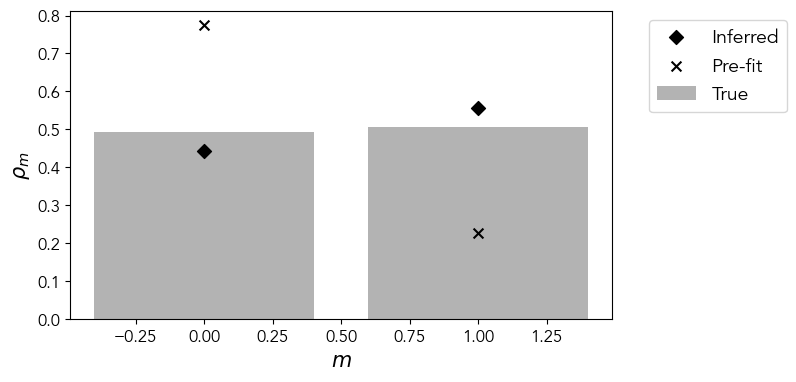

In [27]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.bar(bins_h, h, color = "dimgray", alpha = 0.5, label = "True")
ax.scatter(np.arange(M), FSC_inferred.rho, color = "black", marker = "D", s = 50, label = "Inferred")
ax.scatter(np.arange(M), rho_pre_fit, color = "black", marker = "x", s = 50, label = "Pre-fit")

ax.set_xlabel("$m$", fontsize = 15)
ax.set_ylabel("$\\rho_m$", fontsize = 15)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend(fontsize = 14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Finite State Controller with $M = 2$, $A = 2$, $Y = 5$

# Observations, one step

In [48]:
NStepsObs = 1
NTraj = 500
Y = 5
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 2*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NTraj, NStepsObs, RateMatrixObs, initial_seed = 0)

In [49]:
M = 2
A = 2

np.random.seed(8734)
Theta = np.random.randn(Y, M, M, A)

Psi = np.array([1.25, 1])

FSC = FSC_DiscreteObs(Theta, Psi, verbose = True)

Initializing FSC with 2 memory states, 2 actions, and 5 observations.


In [50]:
FSC.load_observations(observations)

In [51]:
NSteps = NStepsObs
trajectories = FSC.generate_trajectories(NSteps)
Time = np.arange(NSteps)

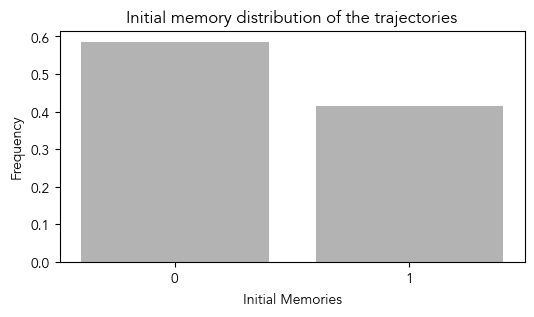

In [52]:
initial_memories = np.array([tr["memories"][0] for tr in trajectories])

fig, ax = plt.subplots(1,1, figsize=(6,3))

h, bins_h = np.histogram(initial_memories.flatten(), bins = np.arange(-0.5, M+0.5, 1))
h = h/np.sum(h)
bins_h = (bins_h[1:] + bins_h[:-1])/2

ax.bar(bins_h, h, width = 0.8, color = 'dimgray', alpha = 0.5)

ax.set_xlabel('Initial Memories')
ax.set_ylabel('Frequency')

ax.set_xticks(np.arange(0, M, 1))

ax.set_title('Initial memory distribution of the trajectories')

plt.show()

In [53]:
FSC.evaluate_nloglikelihood(trajectories[0])

0.4866512640119291

### Inference

In [59]:
FSC_tofit = FSC_InferenceDiscreteObs(M, A, Y, seed = 123456)
FSC_tofit.load_theta(Theta.astype(np.float32))
FSC_tofit.load_trajectories(trajectories)
FSC_tofit.evaluate_nloglikelihood(idx_traj = 0)

tensor(0.8743, device='mps:0', grad_fn=<SubBackward0>)

In [60]:
psi_pre_fit = FSC_tofit.psi.detach().cpu().numpy()
rho_pre_fit = FSC_tofit.rho.detach().cpu().numpy()

In [61]:
tloss, vloss = FSC_tofit.optimize_psionly(NEpochs = 40, NBatch = 100, lr = 0.2, gamma = 0.9)

Training with 400 trajectories and validating with 100 trajectories.
	 Epoch 1 - Batch 1 - Loss: 0.7698332214355469 - Learning rate: 0.2
	 Epoch 1 - Batch 2 - Loss: 0.714845962524414 - Learning rate: 0.2
	 Epoch 1 - Batch 3 - Loss: 0.6702141571044922 - Learning rate: 0.2
	 Epoch 1 - Batch 4 - Loss: 0.6611512756347656 - Learning rate: 0.2
Epoch 1 - Training loss: 0.7040111541748046, Validation loss: 0.6314100839197636
	 Epoch 2 - Batch 1 - Loss: 0.6302373886108399 - Learning rate: 0.18000000000000002
	 Epoch 2 - Batch 2 - Loss: 0.7171786499023437 - Learning rate: 0.18000000000000002
	 Epoch 2 - Batch 3 - Loss: 0.7366289520263671 - Learning rate: 0.18000000000000002
	 Epoch 2 - Batch 4 - Loss: 0.6752102661132813 - Learning rate: 0.18000000000000002
Epoch 2 - Training loss: 0.689813814163208, Validation loss: 0.6226141440868378
	 Epoch 3 - Batch 1 - Loss: 0.7171270751953125 - Learning rate: 0.16200000000000003
	 Epoch 3 - Batch 2 - Loss: 0.6815667724609376 - Learning rate: 0.1620000000000

### Comparison

In [62]:
FSC_inferred = FSC_DiscreteObs(FSC_tofit.theta.detach().cpu().double().numpy(),
                               FSC_tofit.psi.detach().cpu().double().numpy(), verbose = True)

Initializing FSC with 2 memory states, 2 actions, and 5 observations.


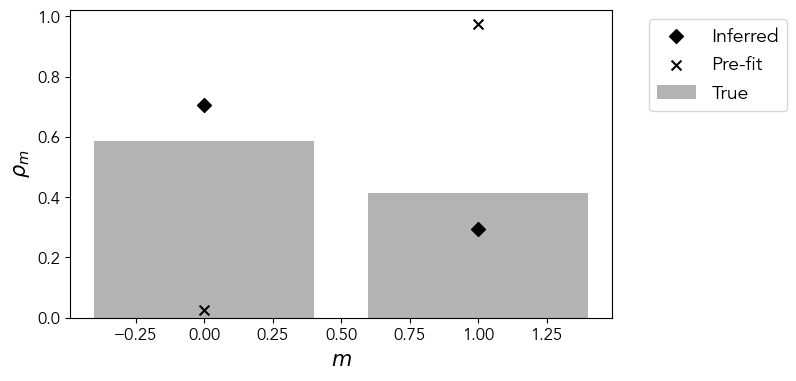

In [63]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.bar(bins_h, h, color = "dimgray", alpha = 0.5, label = "True")
ax.scatter(np.arange(M), FSC_inferred.rho, color = "black", marker = "D", s = 50, label = "Inferred")
ax.scatter(np.arange(M), rho_pre_fit, color = "black", marker = "x", s = 50, label = "Pre-fit")

ax.set_xlabel("$m$", fontsize = 15)
ax.set_ylabel("$\\rho_m$", fontsize = 15)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend(fontsize = 14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Finite State Controller with $M = 4$, $A = 3$, $Y = 5$

# Observations, one step

In [64]:
NStepsObs = 1
NTraj = 1000
Y = 5
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 2*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NTraj, NStepsObs, RateMatrixObs, initial_seed = 0)

In [66]:
M = 4
A = 3

np.random.seed(0)
Theta = np.random.randn(Y, M, M, A)

Psi = np.random.randn(M)

FSC = FSC_DiscreteObs(Theta, Psi, verbose = True)

Initializing FSC with 4 memory states, 3 actions, and 5 observations.


In [67]:
FSC.load_observations(observations)

In [69]:
NSteps = NStepsObs
trajectories = FSC.generate_trajectories(NSteps)
Time = np.arange(NSteps)

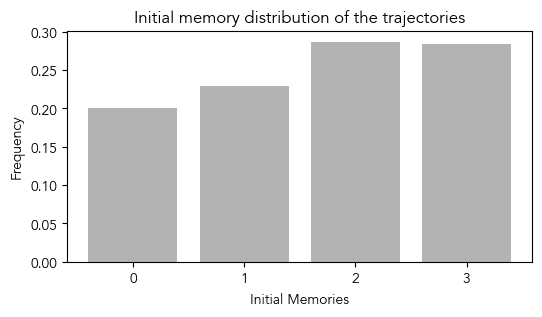

In [70]:
initial_memories = np.array([tr["memories"][0] for tr in trajectories])

fig, ax = plt.subplots(1,1, figsize=(6,3))

h, bins_h = np.histogram(initial_memories.flatten(), bins = np.arange(-0.5, M+0.5, 1))
h = h/np.sum(h)
bins_h = (bins_h[1:] + bins_h[:-1])/2

ax.bar(bins_h, h, width = 0.8, color = 'dimgray', alpha = 0.5)

ax.set_xlabel('Initial Memories')
ax.set_ylabel('Frequency')

ax.set_xticks(np.arange(0, M, 1))

ax.set_title('Initial memory distribution of the trajectories')

plt.show()

In [71]:
FSC.evaluate_nloglikelihood(trajectories[0])

0.7842935779887066

### Inference

In [72]:
FSC_tofit = FSC_InferenceDiscreteObs(M, A, Y, seed = 123)
FSC_tofit.load_theta(Theta.astype(np.float32))
FSC_tofit.load_trajectories(trajectories)
FSC_tofit.evaluate_nloglikelihood(idx_traj = 0)

tensor(0.7764, device='mps:0', grad_fn=<SubBackward0>)

In [73]:
psi_pre_fit = FSC_tofit.psi.detach().cpu().numpy()
rho_pre_fit = FSC_tofit.rho.detach().cpu().numpy()

In [74]:
tloss, vloss = FSC_tofit.optimize_psionly(NEpochs = 20, NBatch = 100, lr = 0.1, gamma = 0.9)

Training with 800 trajectories and validating with 200 trajectories.
	 Epoch 1 - Batch 1 - Loss: 1.066803970336914 - Learning rate: 0.1
	 Epoch 1 - Batch 2 - Loss: 1.0836109161376952 - Learning rate: 0.1
	 Epoch 1 - Batch 3 - Loss: 1.076968002319336 - Learning rate: 0.1
	 Epoch 1 - Batch 4 - Loss: 1.0709051513671874 - Learning rate: 0.1
	 Epoch 1 - Batch 5 - Loss: 1.054081802368164 - Learning rate: 0.1
	 Epoch 1 - Batch 6 - Loss: 1.0732620239257813 - Learning rate: 0.1
	 Epoch 1 - Batch 7 - Loss: 1.0946415710449218 - Learning rate: 0.1
	 Epoch 1 - Batch 8 - Loss: 1.0795824432373047 - Learning rate: 0.1
Epoch 1 - Training loss: 1.074981985092163, Validation loss: 1.0702756717801094
	 Epoch 2 - Batch 1 - Loss: 1.0393124389648438 - Learning rate: 0.09000000000000001
	 Epoch 2 - Batch 2 - Loss: 1.0712783813476563 - Learning rate: 0.09000000000000001
	 Epoch 2 - Batch 3 - Loss: 1.0554747772216797 - Learning rate: 0.09000000000000001
	 Epoch 2 - Batch 4 - Loss: 1.0869413757324218 - Learning 

### Comparison

In [75]:
FSC_inferred = FSC_DiscreteObs(FSC_tofit.theta.detach().cpu().double().numpy(),
                               FSC_tofit.psi.detach().cpu().double().numpy(), verbose = True)

Initializing FSC with 4 memory states, 3 actions, and 5 observations.


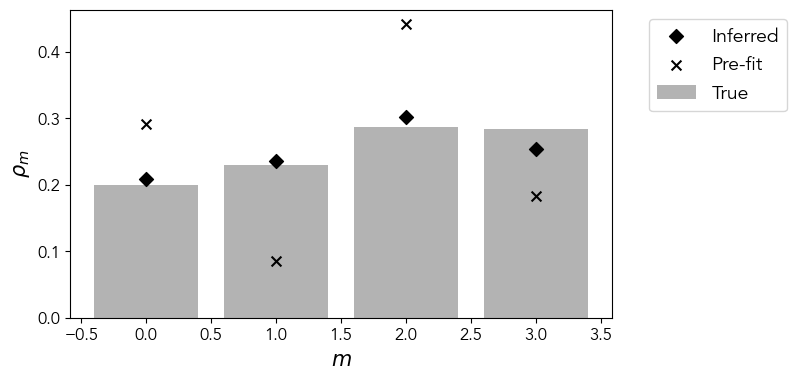

In [76]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.bar(bins_h, h, color = "dimgray", alpha = 0.5, label = "True")
ax.scatter(np.arange(M), FSC_inferred.rho, color = "black", marker = "D", s = 50, label = "Inferred")
ax.scatter(np.arange(M), rho_pre_fit, color = "black", marker = "x", s = 50, label = "Pre-fit")

ax.set_xlabel("$m$", fontsize = 15)
ax.set_ylabel("$\\rho_m$", fontsize = 15)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend(fontsize = 14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Finite State Controller with $M = 8$, $A = 7$, $Y = 5$

# Observations, one step

In [346]:
NStepsObs = 1
NTraj = 3000
Y = 5
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 2*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NTraj, NStepsObs, RateMatrixObs, initial_seed = 3)

In [347]:
M = 8
A = 7

np.random.seed(9)
Theta = np.random.randn(Y, M, M, A)

Psi = np.random.randn(M)

FSC = FSC_DiscreteObs(Theta, Psi, verbose = True)

Initializing FSC with 8 memory states, 7 actions, and 5 observations.


In [348]:
FSC.load_observations(observations)

In [349]:
NSteps = NStepsObs
trajectories = FSC.generate_trajectories(NSteps)
Time = np.arange(NSteps)

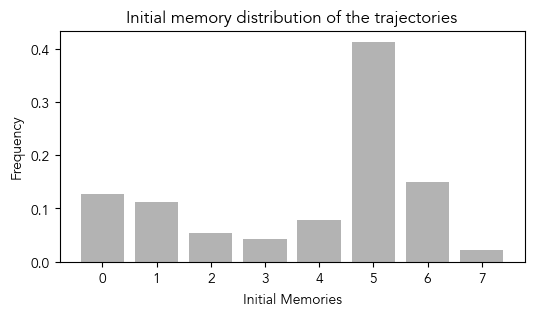

In [350]:
initial_memories = np.array([tr["memories"][0] for tr in trajectories])

fig, ax = plt.subplots(1,1, figsize=(6,3))

h, bins_h = np.histogram(initial_memories.flatten(), bins = np.arange(-0.5, M+0.5, 1))
h = h/np.sum(h)
bins_h = (bins_h[1:] + bins_h[:-1])/2

ax.bar(bins_h, h, width = 0.8, color = 'dimgray', alpha = 0.5)

ax.set_xlabel('Initial Memories')
ax.set_ylabel('Frequency')

ax.set_xticks(np.arange(0, M, 1))

ax.set_title('Initial memory distribution of the trajectories')

plt.show()

In [351]:
FSC.evaluate_nloglikelihood(trajectories[0])

1.4681756798545755

### Inference

In [365]:
FSC_tofit = FSC_InferenceDiscreteObs(M, A, Y, seed = 42, minus1_opt = False)
FSC_tofit.load_theta(Theta.astype(np.float32))
FSC_tofit.load_trajectories(trajectories)
FSC_tofit.evaluate_nloglikelihood(idx_traj = 0)

tensor(1.6269, device='mps:0', grad_fn=<SubBackward0>)

In [366]:
psi_pre_fit = FSC_tofit.psi.detach().cpu().numpy()
rho_pre_fit = FSC_tofit.rho.detach().cpu().numpy()

In [367]:
tloss, vloss = FSC_tofit.optimize_psionly(NEpochs = 100, NBatch = 400, lr = 0.01, gamma = 0.99)

Training with 2400 trajectories and validating with 600 trajectories.
Epoch 1 - Training loss: 1.938591842651367, Validation loss: 1.9297829888264337 - Learning rate: 0.01
Epoch 2 - Training loss: 1.937333450317383, Validation loss: 1.9288926881551742 - Learning rate: 0.0099
Epoch 3 - Training loss: 1.9362227376302084, Validation loss: 1.9280485343933105 - Learning rate: 0.009801
Epoch 4 - Training loss: 1.9353133900960289, Validation loss: 1.927216246922811 - Learning rate: 0.00970299
Epoch 5 - Training loss: 1.9344055938720703, Validation loss: 1.9264730761448543 - Learning rate: 0.0096059601
Epoch 6 - Training loss: 1.9334988911946613, Validation loss: 1.925833835999171 - Learning rate: 0.009509900499
Epoch 7 - Training loss: 1.932799377441406, Validation loss: 1.9252493053674697 - Learning rate: 0.00941480149401
Epoch 8 - Training loss: 1.9320687103271483, Validation loss: 1.924760310848554 - Learning rate: 0.0093206534790699
Epoch 9 - Training loss: 1.9315320587158205, Validation 

### Comparison

In [368]:
FSC_inferred = FSC_DiscreteObs(FSC_tofit.theta.detach().cpu().double().numpy(),
                               FSC_tofit.psi.detach().cpu().double().numpy(), verbose = True)

Initializing FSC with 8 memory states, 7 actions, and 5 observations.


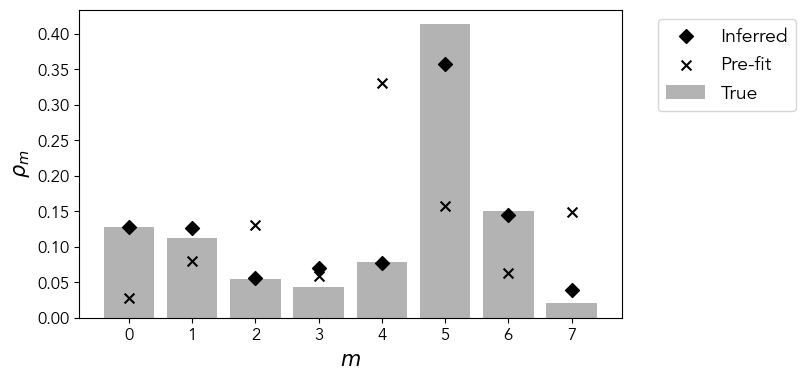

In [369]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.bar(bins_h, h, color = "dimgray", alpha = 0.5, label = "True")
ax.scatter(np.arange(M), FSC_inferred.rho, color = "black", marker = "D", s = 50, label = "Inferred")
ax.scatter(np.arange(M), rho_pre_fit, color = "black", marker = "x", s = 50, label = "Pre-fit")

ax.set_xlabel("$m$", fontsize = 15)
ax.set_ylabel("$\\rho_m$", fontsize = 15)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend(fontsize = 14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()